# Get analysis efficiency

### June 15, 2020

## Code

### Import needed packages

In [164]:
import sys
sys.path.insert(0,"/users/PCON0003/cond0068/.local/lib/python3.7/")
sys.path.append("/users/PAS0654/osu8354/ARA_cvmfs/root_build/lib/") # go to parent dir
sys.path.append("/users/PCON0003/cond0068/.local/lib/python3.7/site-packages/")
import ROOT
import math
import numpy as np
from ROOT import TH1D,TF1, gRandom, gPad, gStyle
import matplotlib.pyplot as plt
from ROOT import TChain, TSelector, TTree
import os
import matplotlib.colors as mcolors
import scipy
from matplotlib.colors import LogNorm
import seaborn as sns
import pandas as pd

### Get data from ROOT files

In [2]:
file_list=[]#Define an empty list
for filename in os.listdir("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/allCuts/data/"):#Loop over desired directory
    if filename.endswith(".root"): #extension, .root in this case
        file_list.append(os.path.join("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/allCuts/data/", str(filename))) #add file name to the list
        
        

In [3]:
chain = TChain("allCuts") #Define chain and tree that needs to be read. "allCuts" in this case.
for line in file_list:
    chain.AddFile(line)

In [4]:
corr_val = []
snr_val = []
failsRcut_V = []
failsRcut_H = []
# this_y_val = []
weight = []
energy = []
failsTopV = []
failsTopH = []
isSurface = []
# peakTheta_300m = []
# peakPhi_300m = []
for entry in chain:
#     if(entry.peakCorr_single[0]<0.01): continue
#     if(entry.peakPhi_single[0]<0):
#         phi.append(entry.peakPhi_single[0]+180) #extract variables of interest
#     else:
    corr_val.append(entry.corr_val[0]) 
    snr_val.append(entry.snr_val[0]) 
    failsRcut_V.append(entry.failsRcut[0])
    failsRcut_H.append(entry.failsRcut[1])
    failsTopV.append(entry.failsTopV)
    failsTopH.append(entry.failsTopH)
    isSurface.append(entry.isSurface)

    
#     this_y_val.append(entry.this_y_val[0])
    weight.append(entry.weight)
    energy.append(entry.energy)
#     peakTheta_300m.append(entry.peakTheta_300m[0]+90)
#     peakPhi_300m.append(entry.peakPhi_300m[0])

### Let's first bin up the energies

In [5]:
d = {'energy':np.array(energy), 'snr':np.array(snr_val), 'corr':np.array(corr_val), "failsCutV":np.array(failsRcut_V), "failsCutH":np.array(failsRcut_H), "failsTopV":failsTopV, "failsTopH":np.array(failsTopH), "isSurface":np.array(isSurface)}
cuts = pd.DataFrame(data=d)
cuts["failsCut"] = ((cuts.failsCutV==1) & (cuts.failsCutH==1))
cuts["failsTopCut"] = ((cuts.failsTopV==1) | (cuts.failsTopH==1))

cuts["passes"] = ((cuts.failsCut==False) & (cuts.failsTopCut==False) & (cuts.isSurface==False))
# cuts.energy.value_counts()
cuts.head()

,energy,snr,corr,failsCutV,failsCutH,failsTopV,failsTopH,isSurface,failsCut,failsTopCut,passes
0,5.724450e+17,5.266871,0.005361,1,1,1,1,1,True,True,False
1,7.536998e+16,5.756939,0.006587,1,1,0,0,0,True,False,False
2,1.427773e+18,8.434304,0.010894,0,1,0,1,1,False,True,False
3,1.754024e+18,10.980052,0.014154,0,1,0,0,1,False,False,False
4,2.848059e+18,40.007315,0.029302,0,0,0,0,0,False,False,True


In [6]:
forBins_half = np.logspace(15.5, 20.5, num=6)
forBins_half

array([3.16227766e+15, 3.16227766e+16, 3.16227766e+17, 3.16227766e+18,
       3.16227766e+19, 3.16227766e+20])

In [7]:
forBins = np.logspace(15, 20, num=6)
forBins

array([1.e+15, 1.e+16, 1.e+17, 1.e+18, 1.e+19, 1.e+20])

In [8]:
Ebins = np.concatenate([forBins_half,forBins])
Ebins = np.sort(Ebins)

In [9]:
cuts["binnedE"] = pd.cut(cuts.energy, bins=Ebins, labels=Ebins[1:]).astype(float)

In [10]:
cuts.head()

,energy,snr,corr,failsCutV,failsCutH,failsTopV,failsTopH,isSurface,failsCut,failsTopCut,passes,binnedE
0,5.724450e+17,5.266871,0.005361,1,1,1,1,1,True,True,False,1.000000e+18
1,7.536998e+16,5.756939,0.006587,1,1,0,0,0,True,False,False,1.000000e+17
2,1.427773e+18,8.434304,0.010894,0,1,0,1,1,False,True,False,3.162278e+18
3,1.754024e+18,10.980052,0.014154,0,1,0,0,1,False,False,False,3.162278e+18
4,2.848059e+18,40.007315,0.029302,0,0,0,0,0,False,False,True,3.162278e+18


### Can now bin up the SNRs

In [43]:
SNR_bins = np.linspace(0,45,45)
# SNR_bins
cuts["binnedSNR"] = pd.cut(cuts.snr, bins=SNR_bins, labels=SNR_bins[1:]).astype(float)

In [44]:
cuts.head()

,energy,snr,corr,failsCutV,failsCutH,failsTopV,failsTopH,isSurface,failsCut,failsTopCut,passes,binnedE,binnedSNR
0,5.724450e+17,5.266871,0.005361,1,1,1,1,1,True,True,False,1.000000e+18,6.136364
1,7.536998e+16,5.756939,0.006587,1,1,0,0,0,True,False,False,1.000000e+17,6.136364
2,1.427773e+18,8.434304,0.010894,0,1,0,1,1,False,True,False,3.162278e+18,9.204545
3,1.754024e+18,10.980052,0.014154,0,1,0,0,1,False,False,False,3.162278e+18,11.250000
4,2.848059e+18,40.007315,0.029302,0,0,0,0,0,False,False,True,3.162278e+18,40.909091


### Get the efficiencies per energy

In [45]:
total_num = cuts.binnedE.value_counts(sort=False)
total_num=total_num.sort_index()
forEff = pd.DataFrame(data = total_num)
forEff.index.name = 'Energy'
# forEff.index

In [46]:
passesCuts = cuts.loc[cuts.passes == True].binnedE.value_counts()
passesCuts = passesCuts.sort_index()
forEff["passesCuts"]=passesCuts
passesCuts

1.000000e+16       7
3.162278e+16     186
1.000000e+17     898
3.162278e+17    2169
1.000000e+18    3194
3.162278e+18    3377
1.000000e+19    2725
3.162278e+19    1509
1.000000e+20     653
3.162278e+20     308
Name: binnedE, dtype: int64

In [47]:
forEff.passesCuts=forEff.passesCuts.fillna(0)
forEff.head()

,binnedE,passesCuts
Energy,,
3.162278e+15,103,0.0
1.000000e+16,278,7.0
3.162278e+16,1062,186.0
1.000000e+17,3450,898.0
3.162278e+17,6195,2169.0


### Energies are binned up, let's calculate the efficiency

In [107]:
diffuseEff = pd.read_csv("./data/diffuse_eff.txt")
diffuseEff_OSU = pd.read_csv("./data/diffuse_eff_OSU.txt")
diffuseEff.head()

,energy,eff
0,11300000.0,0.0688
1,18200000.0,0.1100
2,28800000.0,0.1490
3,39600000.0,0.1820
4,60900000.0,0.2090


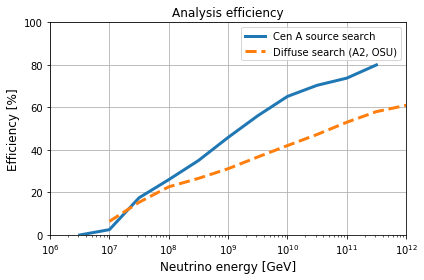

In [114]:
plt.plot(forEff.index/1E9, 100*forEff.passesCuts/forEff.binnedE,linewidth = 3, label = "Cen A source search")
plt.plot(np.power(10,diffuseEff_OSU.E)/1E9, 100*diffuseEff_OSU["a2_eff"],"--", linewidth = 3, label = "Diffuse search (A2, OSU)")

plt.xscale('log')
plt.xlabel("Neutrino energy [GeV]", fontsize=12)
plt.ylabel("Efficiency [%]", fontsize=12)
plt.title("Analysis efficiency")
plt.xlim(1E6,1E12)
plt.ylim(0,100)

plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("./plots/CenA_search_efficiency_OSU.png", dpi=200) 

### Efficiencies as a function of SNR

In [50]:
total_num = cuts.binnedSNR.value_counts(sort=False)
total_num=total_num.sort_index()
forEff_SNR = pd.DataFrame(data = total_num)
forEff_SNR.index.name = 'SNR'
forEff_SNR.head()

,binnedSNR
SNR,
3.068182,2
4.090909,1727
5.113636,5826
6.136364,3811
7.159091,2511


In [51]:
passesCuts_SNR = cuts.loc[cuts.passes == True].binnedSNR.value_counts()
passesCuts_SNR = passesCuts_SNR.sort_index()
forEff_SNR["passesCuts_SNR"]=passesCuts_SNR
forEff_SNR.passesCuts_SNR=forEff_SNR.passesCuts_SNR.fillna(0)
forEff_SNR.head()

,binnedSNR,passesCuts_SNR
SNR,,
3.068182,2,0.0
4.090909,1727,7.0
5.113636,5826,69.0
6.136364,3811,526.0
7.159091,2511,1160.0


In [69]:
diffuse_EffSNR = pd.read_csv("./data/Eff_vs_SNR.txt")
diffuse_EffSNR_Brian = pd.read_csv("./data/Eff_vs_SNR_Brian.txt")

diffuse_EffSNR.head()

,snr,a2_eff,a2_err,a3_eff,a3_err
0,4.0,0.0004,0.0001,0.0006,0.0002
1,5.0,0.0112,0.0009,0.0068,0.0006
2,6.0,0.0939,0.0033,0.0944,0.0031
3,7.0,0.2905,0.0073,0.2884,0.0069
4,8.0,0.4719,0.0114,0.3603,0.0145
5,9.0,0.5854,0.0146,0.5275,0.0131
6,10.0,0.6367,0.0170,0.5693,0.0151
7,11.0,0.6633,0.0185,0.6065,0.0170
8,12.0,0.6890,0.0206,0.6143,0.0184
9,13.0,0.6929,0.0218,0.6053,0.0191


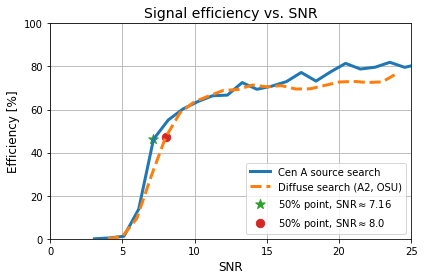

In [158]:
plt.plot(forEff_SNR.index, 100*forEff_SNR.passesCuts_SNR/forEff_SNR.binnedSNR, linewidth = 3, label = "Cen A source search")
# plt.plot(diffuse_EffSNR.snr, 100*diffuse_EffSNR["eff"], label = "Diffuse search (A2, MYL)")
plt.scatter(7.159091, 46.196734, s=100, marker = "*",color = "C2", label=r'50% point, SNR$\approx 7.16$')
plt.plot(diffuse_EffSNR_Brian.snr, 100*diffuse_EffSNR_Brian["a2_eff"],"--", linewidth = 3, label = "Diffuse search (A2, OSU)")
plt.scatter(8.0,100*0.4719, s=70, color="C3",marker = "o", label=r'50% point, SNR$\approx 8.0$')

# plt.xscale('log')
plt.xlabel("SNR", fontsize=12)
plt.ylabel("Efficiency [%]", fontsize=12)
plt.title("Signal efficiency vs. SNR", fontsize=14)
plt.grid()
plt.xlim(0,25)
plt.ylim(0,100)

plt.legend()
plt.tight_layout()
plt.savefig("./plots/CenA_search_SNRefficiency.png", dpi=200)

#### 50% point change

In [80]:
diffuse_EffSNR_Brian.loc[diffuse_EffSNR_Brian.index==4]

,snr,a2_eff,a2_err,a3_eff,a3_err
4,8.0,0.4719,0.0114,0.3603,0.0145


In [102]:
forEff_SNR["eff"] = 100*forEff_SNR.passesCuts_SNR/forEff_SNR.binnedSNR
forEff_SNR.loc[forEff_SNR.eff < 50]
# forEff_SNR

,binnedSNR,passesCuts_SNR,eff
SNR,,,
3.068182,2,0.0,0.000000
4.090909,1727,7.0,0.405327
5.113636,5826,69.0,1.184346
6.136364,3811,526.0,13.802152
7.159091,2511,1160.0,46.196734


#### Put cut line in the SNR vs $C_{sky}$ plot

In [54]:
m = -2080
y = np.linspace(0,1,50);
interc = 20.6-0.54
interc2 = 20.6

x = m*y+interc
x2 = m*y+interc2

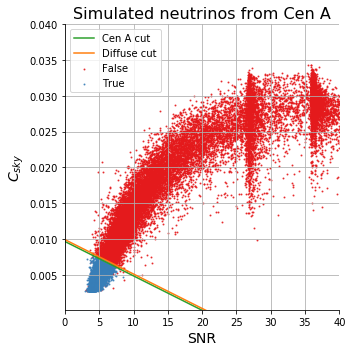

In [163]:
# sns.catplot(x="snr", y="corr", data=df2, hue='failsRcut');
sns.lmplot( x="snr", y="corr", data=cuts, fit_reg=False, hue='failsCut', legend=True, palette="Set1", legend_out=False, scatter_kws={"s": 1})
plt.plot(x,y, color="C2", label = "Cen A cut")
plt.plot(x2,y, color="C1", label = "Diffuse cut")


plt.xlabel("SNR", fontsize=14)
plt.ylabel("$C_{sky}$", fontsize=14)
# plt.xscale('log')
# plt.xscale('log')

plt.xlim(0,40)
plt.ylim(1e-4,0.04)
plt.grid()
plt.grid(which='minor', axis='both')
plt.title("Simulated neutrinos from Cen A", fontsize=16)
plt.legend()
plt.tight_layout()
# plt.savefig("./plots/SNRvsCsky_CenA.png", dpi=200)


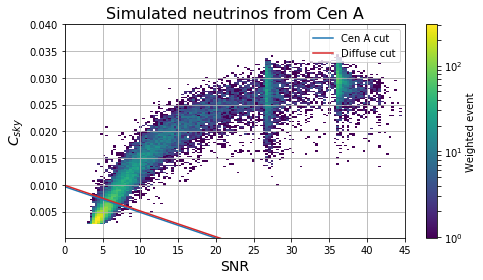

In [65]:
plt.figure(figsize=(7,4))
plt.hist2d(snr_val,corr_val, bins=120, weights=weight,norm=LogNorm());

# plt.hist2d(snr_val,corr_val, bins=420, weights=weight,norm=LogNorm());

plt.colorbar(label="Weighted event" )
plt.xlabel("SNR", fontsize=14)
plt.ylabel("$C_{sky}$", fontsize=14)
# plt.xscale('log')
# plt.xscale('log')
plt.plot(x,y, color="C0", label = "Cen A cut")
plt.plot(x2,y, color="C3", label = "Diffuse cut")

plt.xlim(0,45)
plt.ylim(1e-4,0.04)
plt.grid()
plt.grid(which='minor', axis='both')
plt.legend()
plt.title("Simulated neutrinos from Cen A", fontsize=16)
plt.tight_layout()
plt.savefig("./plots/SNRvsCsky_CenADiffuse.png", dpi=200)

## Comments

In [170]:
a=(29.03)/(360*2)
-np.log(a)/-5.96

-0.538745207042544